In [54]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from numpy import poly1d,polyfit
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.optimize import minimize
%matplotlib inline
from scipy.integrate import solve_ivp
import math
import statistics
from random import randrange # Obtener un numero randomico
import pygame

## Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

- Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán\ escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:

- Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

In [39]:
#cargamos nuestro set de datos
data = pd.read_csv('datosPrueba.csv')
data = data[data['Country/Region'].isin(['Uruguay'])]
data = data.loc[:,['Date','Confirmed']]
formatoFecha = '%Y-%m-%d'
fecha = data['Date']
data['Date'] = fecha.map(lambda x: (datetime.strptime(x, formatoFecha) - datetime.strptime('2020-01-22', formatoFecha)).days)
dias = list(data['Date'])
print(data)

       Date  Confirmed
78995     0          0
78996     1          0
78997     2          0
78998     3          0
78999     4          0
...     ...        ...
79295   300       4208
79296   301       4296
79297   302       4377
79298   303       4477
79299   304       4564

[305 rows x 2 columns]


<AxesSubplot:xlabel='Date'>

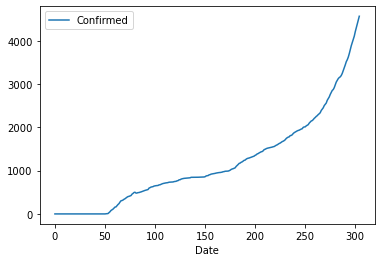

In [40]:
data.plot(x='Date', y='Confirmed')

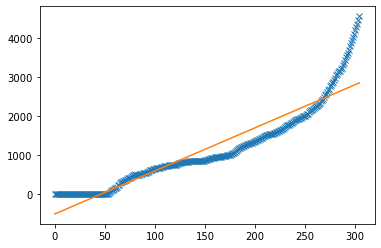

In [41]:
#regresion lineal
x= list(data.iloc[:,0])#fecha 
y= list(data.iloc[:,1])#casos
#Creamos un objeto de regresion lineal
lineal = linear_model.LinearRegression()
#entrenamos el modelo 
lineal.fit(np.array(x).reshape(-1,1), y)
plt.plot(x, y, 'x')
plt.plot(x, lineal.predict(np.array(x).reshape(-1, 1)))


[2862.06934858] Dia:  1
[2873.14146154] Dia:  2
[2884.2135745] Dia:  3
[2895.28568746] Dia:  4
[2906.35780042] Dia:  5
[2917.42991338] Dia:  6
[2928.50202634] Dia:  7


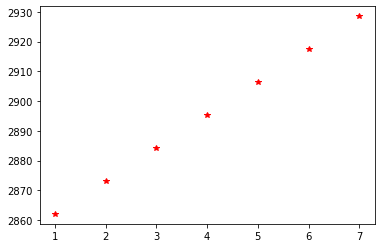

In [42]:
j = 1
for i in range(305, 312):
    ##PREDICCION PARA 7 DIAS SIGUIENTES
    prediccion = lineal.predict([[i]])
    print(prediccion, 'Dia: ',j)
    plt.plot(j, prediccion, 'r*')
    j += 1

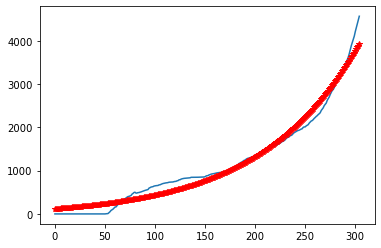

In [43]:
#regresion exponencial
def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

g = [100, 0.01, 200, 0.01]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_exponencial, x, y, g)
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(x, y)
plt.plot(x, pre, 'r*')

Prediccion 1 dias  3964 Infectados
Prediccion 2 dias  4005 Infectados
Prediccion 3 dias  4046 Infectados
Prediccion 4 dias  4088 Infectados
Prediccion 5 dias  4131 Infectados
Prediccion 6 dias  4174 Infectados
Prediccion 7 dias  4217 Infectados


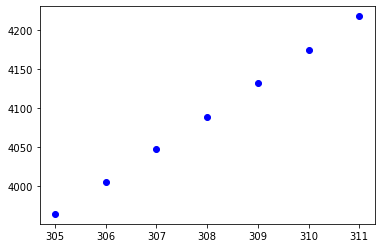

In [44]:
predi7 = np.array([i for i in range(len(x), len(x)+7)], dtype = float)
j = 1
for i in range(305, 312):
    ##PREDICCION PARA 7 DIAS SIGUIENTES
    print('Prediccion', j , 'dias ', (int(reg_exponencial(predi7, *popt)[-8+j])), 'Infectados')
    j += 1
plt.plot(predi7, reg_exponencial(predi7, *popt), 'bo')


[297, 179, 74, 154, 195, 284, 32, 232, 280, 237, 268, 9, 12, 258, 214, 125, 175, 140, 228, 161, 199, 157, 143, 233, 28, 298, 144, 99, 113, 116, 5, 132, 44, 181, 37, 253, 269, 156, 289, 34, 53, 155, 147, 4, 267, 240, 101, 273, 64, 225, 277, 104, 184, 65, 72, 133, 24, 226, 121, 260, 81, 158, 92, 16, 210, 270, 180, 197, 234, 256, 108, 205, 219, 73, 203, 97, 42, 192, 91, 30, 115, 48, 21, 174, 218, 112, 141, 291, 170, 139, 247, 8, 236, 275, 27, 216, 26, 102, 183, 95, 137, 243, 98, 281, 93, 168, 57, 201, 160, 257, 20, 66, 162, 126, 231, 299, 124, 118, 304, 33, 75, 110, 165, 50, 80, 282, 264, 119, 35, 185, 295, 68, 14, 83, 70, 164, 227, 235, 40, 208, 254, 46, 182, 249, 107, 105, 134, 131, 90, 150, 189, 85, 265, 276, 51, 17, 86, 41, 103, 176, 288, 123, 200, 52, 130, 301, 138, 302, 261, 172, 54, 294, 39, 223, 128, 248, 255, 23, 206, 0, 79, 207, 198, 292, 3, 286, 61, 67, 196, 250, 18, 94, 213, 278, 71, 246, 186, 146, 69, 194, 169, 217, 19, 167, 202, 129, 303, 151, 29, 11, 13, 166, 78, 230, 88, 2

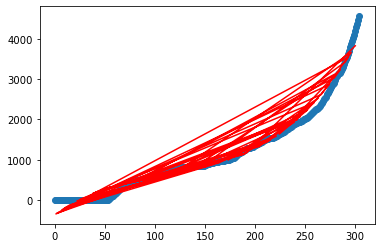

In [45]:
#regresion polinomial
plt.plot(x, y, 'o')
p = poly1d(polyfit(x, y, deg=4))
Xtrain, Xtest, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(Xtrain, Xtest, y_train, y_test)
poli_reg = PolynomialFeatures(degree = 3)
X_train = poli_reg.fit_transform(np.array(Xtrain).reshape(-1,1))
X_test = poli_reg.fit_transform(np.array(Xtest).reshape(-1,1))
pr = linear_model.LinearRegression()
pr.fit(X_train, y_train)
Y_pred_pr = pr.predict(X_test)
plt.plot(Xtest, Y_pred_pr, color='red')

Prediccion 1 dias  3732.85781648143 Infectados
Prediccion 2 dias  3773.729598628467 Infectados
Prediccion 3 dias  3814.9888634031868 Infectados
Prediccion 4 dias  3856.637664632025 Infectados
Prediccion 5 dias  3898.6780561414234 Infectados
Prediccion 6 dias  3941.112091757822 Infectados
Prediccion 7 dias  3983.941825307661 Infectados


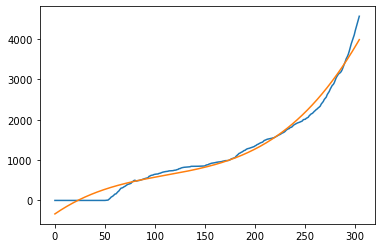

In [46]:
model = LinearRegression()
poly = PolynomialFeatures(degree=4, include_bias=True)
x_poli = poli_reg.fit_transform(np.array(x).reshape(-1,1))
model.fit(x_poli, y)
y_pred = model.predict(x_poli)
plt.plot(x, y)
plt.plot(x, y_pred)
j = 1
for i in range(305, 312):
    ##PREDICCION PARA 7 DIAS SIGUIENTES
    print('Prediccion', j , 'dias ', (y_pred[-8+j]), 'Infectados')
    j += 1



/Users/macbookpro/opt/anaconda3/envs/mientorno/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/macbookpro/opt/anaconda3/envs/mientorno/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


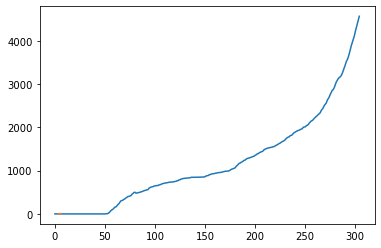

In [47]:
#regresion logaritmica
plt.plot(x, y)
xlog = np.log(x)
ylog = np.log(y)
plt.plot(xlog, ylog)


<AxesSubplot:xlabel='Date'>

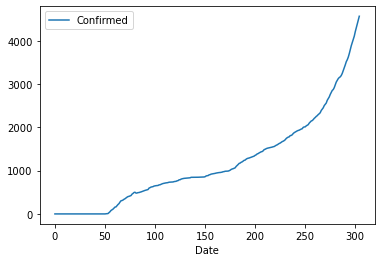

In [48]:
data.plot(x='Date', y='Confirmed')

antes


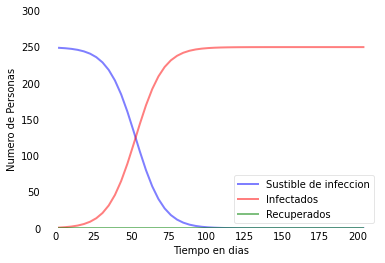

RE: 2714780933.1550126


In [53]:
#SIR
N = 250
#Cantidad de infectados iniciales
I0 = 1
#Cantidad de recuperados
R0 = 0
#Poblacion restante suceptibles
S0 = N -I0 - R0
print('antes')
def loss(point, data, S0, I0, R0):
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
        
    solve = solve_ivp(SIR, [0, len(data)], [S0,I0,R0], t_eval = np.arange(0, len(data), 1))
    r = math.sqrt(statistics.mean((solve.y[1] - data)**2))
    return r

opt = minimize(loss, [0.001, 0.001], args=(y, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
beta, gamma = opt.x

t = np.linspace(2, 204)


def derivada(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(derivada, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
RE = ((beta/gamma)*N)
print('RE:', RE)

- mejor prediccion es la regresion polinomica y la exponencial, la que intenta pasar por su mayoria de puntos
- Ventaja y desventa, eso siempre dependera del modelo y ademas de tener una buena base de datos en los que las variables tenga algun tipo de relacion, a mi paracer el modelo polinomico saca mucha ventaja con respecto a la lineas, y con respecto al modelo exponencial es algo similar tiene una buena prediccion y de igual manera trata de ajustarse a cada punto.